## Telecom Customer Churn prediction

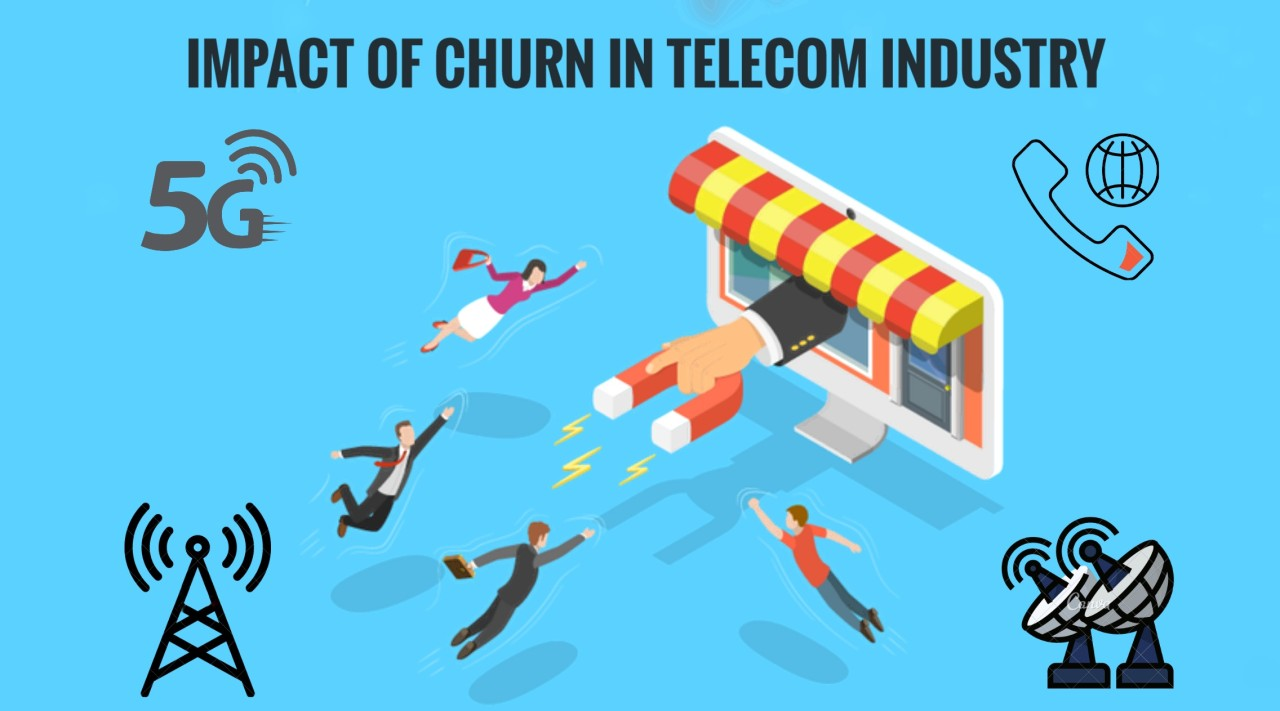

## Project Overview
#### The project aims to analyze customer churn in a telecommunications company and develop predictive models to identify at-risk customers. The ultimate goal is to provide actionable insights and recommendations to reduce churn and improve customer retention.

### Import required Libraries

In [80]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_colwidth",None)
pd.set_option("display.max_columns",30)
pd.set_option("display.max_rows",40)


from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, roc_auc_score, auc, roc_curve, recall_score, f1_score
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, KFold, RepeatedStratifiedKFold
import pickle

### Load the dataset

In [81]:
df=pd.read_excel("Telecom.xlsx")

## Exploratory Data Analysis (EDA)
#### Initial Data Understanding
#### Data Types
#### Duplicates
#### Missing Values

In [82]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [83]:
print(f"No of row in the dataset - {df.shape[0]} ")
print(f"No of column in the dataset - {df.shape[1]} ")

No of row in the dataset - 7043 
No of column in the dataset - 21 


### Structure and data type of all the columns

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Check for the duplicate values

In [85]:
df.duplicated().sum()

0

### Check for the missing values

In [86]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

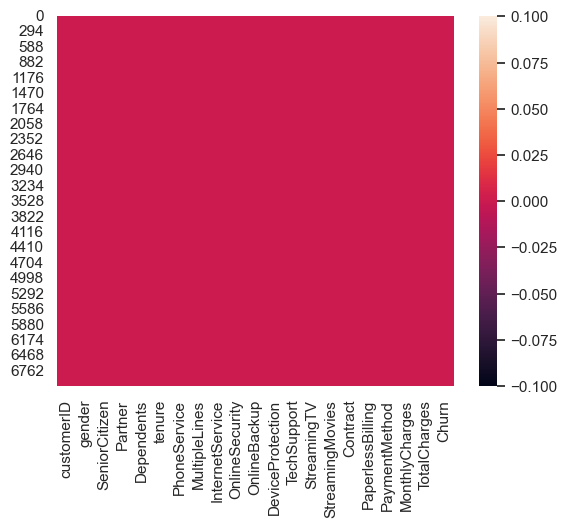

In [87]:
sns.heatmap(df.isnull())
plt.show()

In [88]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### Get statistical summary


In [89]:
# Summary of stats
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [90]:
df['gender'].value_counts()

gender
Male      3555
Female    3488
Name: count, dtype: int64

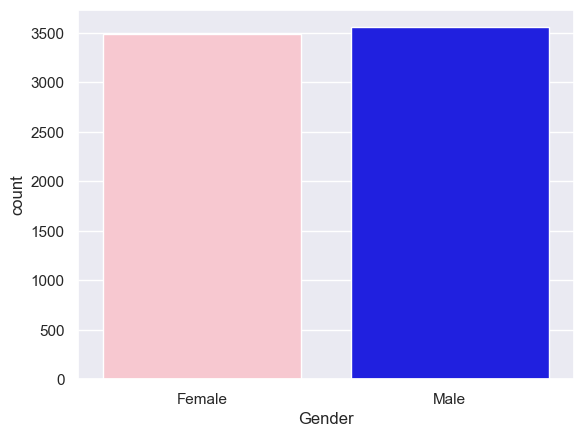

In [91]:
sns.countplot(x = 'gender', data = df, palette=['pink','blue'])
plt.xlabel('Gender')
plt.show()

In [92]:
df['InternetService'].value_counts()

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

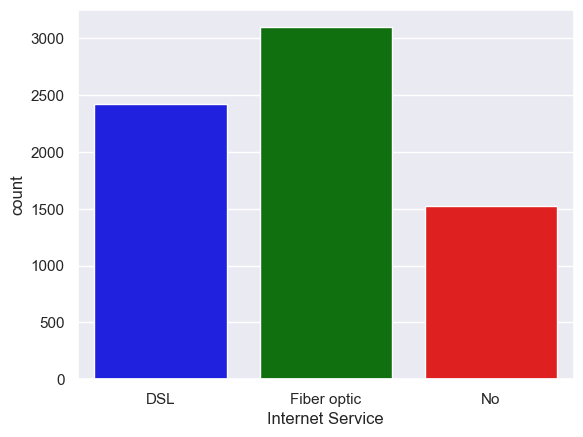

In [93]:
sns.countplot(x = 'InternetService', data=df, palette=['blue','green','red'])
plt.xlabel('Internet Service')
plt.show()

In [94]:
df['MultipleLines'].value_counts()

MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

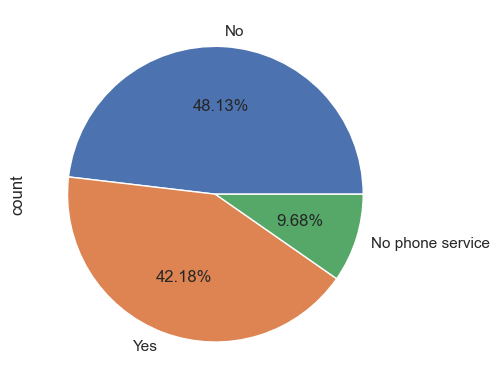

In [95]:
df['MultipleLines'].value_counts().plot.pie(autopct='%0.2f%%')
plt.show()

In [96]:
df['OnlineSecurity'].value_counts()

OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64

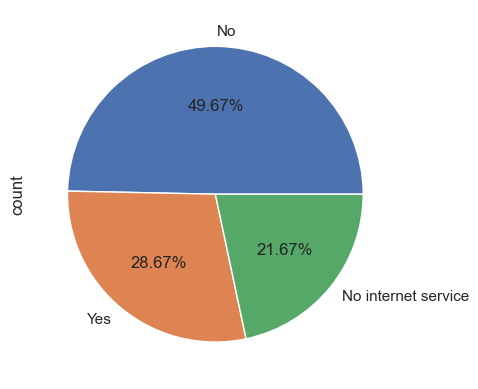

In [97]:
df['OnlineSecurity'].value_counts().plot.pie(autopct='%0.2f%%')
plt.show()

In [98]:
df['OnlineBackup'].value_counts()

OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64

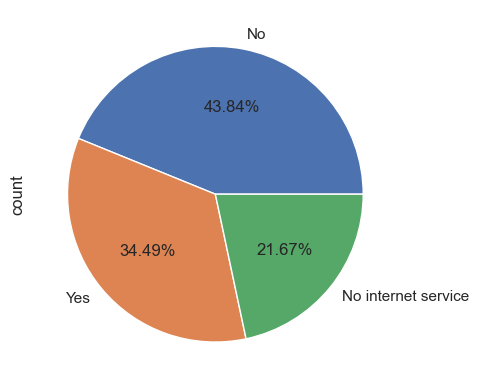

In [99]:
df['OnlineBackup'].value_counts().plot.pie(autopct='%0.2f%%')
plt.show()

### Check for the unique values of each columns

In [100]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [101]:
for i in df.columns:
    print("****************************",i," ********************")
    print()
    print(set(df[i].tolist()))
    print()

**************************** customerID  ********************

{'5382-TEMLV', '0224-RLWWD', '1685-VAYJF', '9124-LHCJQ', '7633-MVPUY', '6861-OKBCE', '6103-QCKFX', '3466-WAESX', '7698-YFGEZ', '9972-NKTFD', '1077-HUUJM', '7743-EXURX', '7067-KSAZT', '3223-DWFIO', '5502-RLUYV', '8722-PRFDV', '1452-KIOVK', '1222-LRYKO', '6574-MCOEH', '5536-RTPWK', '0680-DFNNY', '3039-MJSLN', '3791-LGQCY', '2682-KEVRP', '0603-OLQDC', '6937-GCDGQ', '8920-NAVAY', '1480-IVEVR', '6227-HWPWX', '9378-FXTIZ', '4013-TLDHQ', '0942-KOWSM', '9086-YJYXS', '9114-DPSIA', '4828-FAZPK', '1918-ZBFQJ', '6745-JEFZB', '0100-DUVFC', '1837-YQUCE', '0125-LZQXK', '2362-IBOOY', '3823-KYNQY', '8665-UTDHZ', '2294-DMMUS', '8894-JVDCV', '1169-SAOCL', '7398-HPYZQ', '6828-HMKWP', '2615-YVMYX', '2005-DWQZJ', '1656-DRSMG', '4229-CZMLL', '9818-XQCUV', '1573-LGXBA', '1092-WPIVQ', '2226-ICFDO', '5313-FPXWG', '2656-FMOKZ', '4636-OLWOE', '4833-QTJNO', '4254-QPEDE', '8285-ABVLB', '6599-GZWCM', '2748-MYRVK', '3982-JGSFD', '2834-SPCJV', '1207-BLKSA'

In [102]:
df=df.drop(['customerID'],axis=1)

In [103]:
# Checking for spaces
spaces = [i for i in df['TotalCharges'].values if i == ' ']
len(spaces)

11

In [104]:
### Since blank String exists, first we need to replcae blank with nan
df['TotalCharges']=df['TotalCharges'].replace(" ",np.nan)

In [105]:
df.TotalCharges = pd.to_numeric(df.TotalCharges)

In [106]:
df.isnull().sum()/len(df)*100

gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
tenure              0.000000
PhoneService        0.000000
MultipleLines       0.000000
InternetService     0.000000
OnlineSecurity      0.000000
OnlineBackup        0.000000
DeviceProtection    0.000000
TechSupport         0.000000
StreamingTV         0.000000
StreamingMovies     0.000000
Contract            0.000000
PaperlessBilling    0.000000
PaymentMethod       0.000000
MonthlyCharges      0.000000
TotalCharges        0.156183
Churn               0.000000
dtype: float64

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [108]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


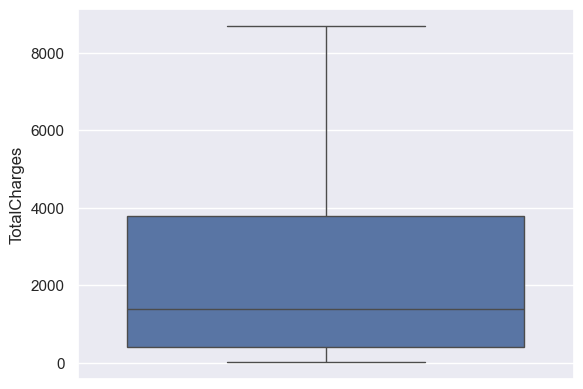

In [109]:
sns.boxplot(y='TotalCharges',data=df)
plt.show()

In [110]:
#Imputation of null values (if Highly skewed go for mean), median if not skewed
## If no outlier exists, go for mean or else median()
## we can also try KNN imputation

# replace nan with mean
df['TotalCharges']=df['TotalCharges'].fillna(df['TotalCharges'].mean())

"""
from sklearn.impute import KNNImputer
imputer = KNNImputer()
df_imputed = pd.DataFrame(imputer.fit_transform(df["TotalCharges"]) , columns = df.columns)
"""

'\nfrom sklearn.impute import KNNImputer\nimputer = KNNImputer()\ndf_imputed = pd.DataFrame(imputer.fit_transform(df["TotalCharges"]) , columns = df.columns)\n'

In [111]:
df.isnull().sum()/len(df)*100

gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64

In [112]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [113]:
# Checking unique value/categories at each columns
for i in df.columns:
    print("No of unique values in ",i,"is ",df[i].nunique())

No of unique values in  gender is  2
No of unique values in  SeniorCitizen is  2
No of unique values in  Partner is  2
No of unique values in  Dependents is  2
No of unique values in  tenure is  73
No of unique values in  PhoneService is  2
No of unique values in  MultipleLines is  3
No of unique values in  InternetService is  3
No of unique values in  OnlineSecurity is  3
No of unique values in  OnlineBackup is  3
No of unique values in  DeviceProtection is  3
No of unique values in  TechSupport is  3
No of unique values in  StreamingTV is  3
No of unique values in  StreamingMovies is  3
No of unique values in  Contract is  3
No of unique values in  PaperlessBilling is  2
No of unique values in  PaymentMethod is  4
No of unique values in  MonthlyCharges is  1585
No of unique values in  TotalCharges is  6531
No of unique values in  Churn is  2


In [114]:
for i in df.columns:
    print("No of unique values in ",i,"is ",df[i].unique())

No of unique values in  gender is  ['Female' 'Male']
No of unique values in  SeniorCitizen is  [0 1]
No of unique values in  Partner is  ['Yes' 'No']
No of unique values in  Dependents is  ['No' 'Yes']
No of unique values in  tenure is  [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
No of unique values in  PhoneService is  ['No' 'Yes']
No of unique values in  MultipleLines is  ['No phone service' 'No' 'Yes']
No of unique values in  InternetService is  ['DSL' 'Fiber optic' 'No']
No of unique values in  OnlineSecurity is  ['No' 'Yes' 'No internet service']
No of unique values in  OnlineBackup is  ['Yes' 'No' 'No internet service']
No of unique values in  DeviceProtection is  ['No' 'Yes' 'No internet service']
No of unique values in  TechSupport is  ['No' 'Yes' 'No internet service']
No of unique values in  Streami

In [115]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Data wrangling

In [116]:
print("No of Customer churning:" ,df[df["Churn"] == "Yes"].Churn.count())
df_churn = df[df["Churn"] == "Yes"]
print("No of Customer with Phone Service:" ,df[df["PhoneService"] == "Yes"]["PhoneService"].count())
print("No of Customer with Phone Service:" ,df[df["InternetService"] == "DSL"]["PhoneService"].count())
df_churn

No of Customer churning: 1869
No of Customer with Phone Service: 6361
No of Customer with Phone Service: 2421


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
13,Male,0,No,No,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7021,Male,0,No,No,12,Yes,No,DSL,No,No,No,Yes,Yes,No,One year,Yes,Electronic check,59.80,727.80,Yes
7026,Female,0,No,No,9,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),44.20,403.35,Yes
7032,Male,1,No,No,1,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,Yes
7034,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes


In [117]:
## % Total no of customer churning
print("Total no of customers ", df["Churn"].count())
print("Total no of customers churning ",len(df_churn))
perc_churn = (len(df_churn)/len(df))*100
print(f"Percentage of customer churning :{round(perc_churn, 2)}%")

Total no of customers  7043
Total no of customers churning  1869
Percentage of customer churning :26.54%


In [118]:
df["SeniorCitizen"].value_counts()/len(df)*100.0

SeniorCitizen
0    83.785319
1    16.214681
Name: count, dtype: float64

In [119]:
df["Partner"].value_counts()/len(df)*100.0

Partner
No     51.69672
Yes    48.30328
Name: count, dtype: float64

In [120]:
### Check whether dataset is a blanaced dataset or imbalance dataset
df["Churn"].value_counts()/len(df)*100.0

Churn
No     73.463013
Yes    26.536987
Name: count, dtype: float64

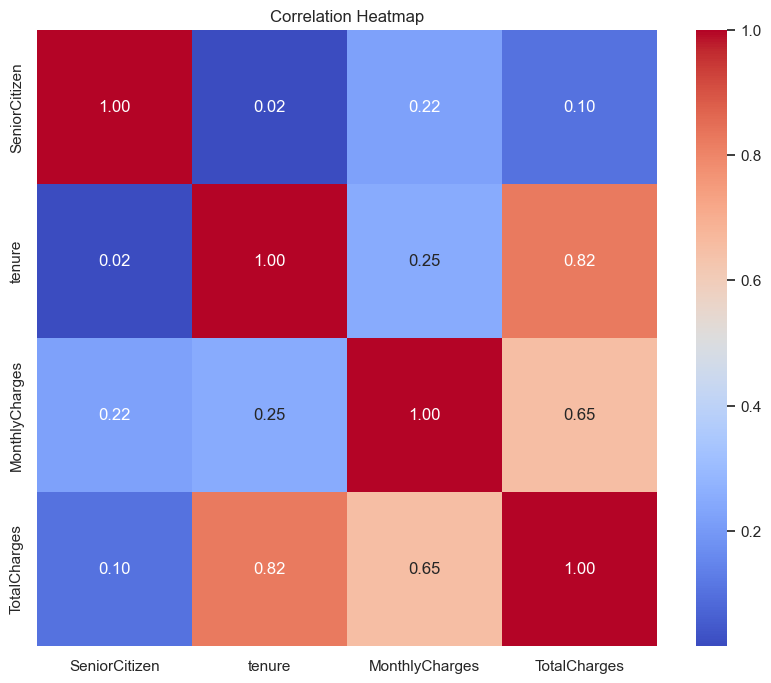

In [121]:
# Correlation heatmap for numeric features
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [122]:
## Convert Target variable to Numeric value
df["Churn"] = np.where(df["Churn"] == "Yes", 1, 0)

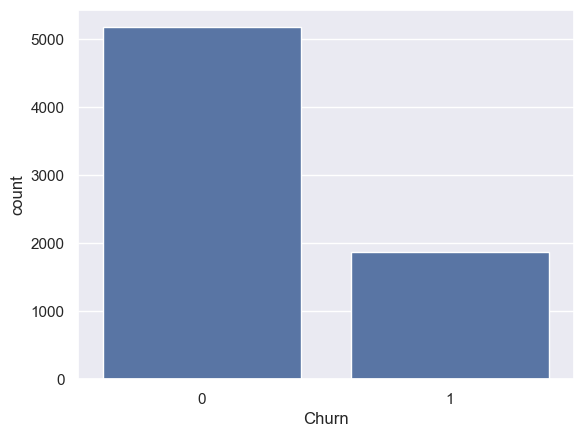

In [123]:
sns.countplot(x='Churn', data=df)
plt.show()

In [124]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


## Feature Engineering method along with model building

In [125]:
x = df.drop('Churn', axis=1)
y = df['Churn']

In [126]:
x.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


In [127]:
x.shape

(7043, 19)

In [128]:
y.shape

(7043,)

In [129]:
x.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [130]:
x.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
dtype: object

### Encoding -  Applying one hot encoder to convert data type object to numerical dtype of independent features

#### When we have more than 2 values for a unique feature/Variable, we should always for One hot encoder. If feature has 2  values then we go for Label encoder

In [131]:
x = pd.get_dummies(x, columns=['gender','Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'], drop_first = True, dtype='int')

In [132]:
x.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [133]:
x.shape

(7043, 30)

In [134]:
x.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441,0.504756,0.483033,0.299588,0.903166,0.096834,0.421837,0.439585,0.216669,0.216669,0.286668,0.216669,0.344881,0.216669,0.343888,0.216669,0.290217,0.216669,0.384353,0.216669,0.387903,0.209144,0.240664,0.592219,0.216101,0.335794,0.228880
std,0.368612,24.559481,30.090047,2265.000258,0.500013,0.499748,0.458110,0.295752,0.295752,0.493888,0.496372,0.412004,0.412004,0.452237,0.412004,0.475363,0.412004,0.475038,0.412004,0.453895,0.412004,0.486477,0.412004,0.487307,0.406726,0.427517,0.491457,0.411613,0.472301,0.420141
min,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,35.500000,402.225000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,29.000000,70.350000,1400.550000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,55.000000,89.850000,3786.600000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Split the data into train and test

In [135]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2 , random_state=42)

In [136]:
print(f'x_train : {x_train.shape}   ,   x_test : {x_test.shape}')
print(f'y_train : {y_train.shape}   ,   y_test : {y_test.shape}')

x_train : (5634, 30)   ,   x_test : (1409, 30)
y_train : (5634,)   ,   y_test : (1409,)


## Features scaling

In [137]:
## tenure , MonthlyCharges, TotalCharges as there are not having binary values

In [138]:
'''
from sklearn.preprocessing import MinMaxScaler
# Create a MinMaxScaler object to standardize the data
scaler = MinMaxScaler(feature_range = (0,1))

# Apply the MinMaxScaler to the training data (X_train) to standardize it
x_train[['MonthlyCharges','TotalCharges','tenure']] = scaler.fit_transform(x_train[['MonthlyCharges','TotalCharges','tenure']])

# Apply the same standardization to the testing data (X_test) to maintain consistency
x_test[['MonthlyCharges','TotalCharges','tenure']] = scaler.transform(x_test[['MonthlyCharges','TotalCharges','tenure']])
'''

"\nfrom sklearn.preprocessing import MinMaxScaler\n# Create a MinMaxScaler object to standardize the data\nscaler = MinMaxScaler(feature_range = (0,1))\n\n# Apply the MinMaxScaler to the training data (X_train) to standardize it\nx_train[['MonthlyCharges','TotalCharges','tenure']] = scaler.fit_transform(x_train[['MonthlyCharges','TotalCharges','tenure']])\n\n# Apply the same standardization to the testing data (X_test) to maintain consistency\nx_test[['MonthlyCharges','TotalCharges','tenure']] = scaler.transform(x_test[['MonthlyCharges','TotalCharges','tenure']])\n"

In [139]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train[['MonthlyCharges','TotalCharges','tenure']] = scaler.fit_transform(x_train[['MonthlyCharges','TotalCharges','tenure']])
x_test[['MonthlyCharges','TotalCharges','tenure']] = scaler.transform(x_test[['MonthlyCharges','TotalCharges','tenure']])

In [140]:
x_train

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2142,0,-0.465683,-0.000474,-0.422099,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1
1623,0,0.885537,1.074754,1.255366,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,1,0,0,0
6074,0,-1.284605,-1.376499,-1.002985,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1362,0,-1.161766,0.177346,-0.908113,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
6754,0,-1.325551,-0.098524,-0.003468,1,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,0,-1.284605,1.001632,-0.971339,1,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0
5191,0,-0.383791,0.872006,-0.041063,0,1,1,1,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,1,1,0,0
5226,0,-0.834198,-1.452945,-0.877993,1,1,1,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,1,0
5390,1,-0.834198,1.149538,-0.482538,1,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0


In [141]:
x_test

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
185,0,-1.284605,-1.331629,-1.002388,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
2715,0,0.353238,-1.316672,-0.572634,1,0,0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0
3825,0,0.803645,-1.512772,-0.557043,0,1,1,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,1
1807,0,-1.284605,0.381756,-0.979588,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
132,0,1.417836,-0.475768,0.428565,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6366,0,1.294997,0.114195,0.923359,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,1,1,0,0,1
315,0,0.762699,1.501854,1.501702,1,1,1,1,0,1,1,0,0,1,0,1,0,0,0,1,0,1,0,1,1,0,0,1,0,0
2439,0,-0.629468,-1.494492,-0.867511,1,1,1,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0
5002,0,1.499728,-0.695134,0.295876,0,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,1,1,0,0


### Using Feature importance we are going to check which variable is Significant/NonSignificant

In [142]:
# Feature Engineering method along with model building
## RF Baseline Model building along with feature importance

from sklearn.ensemble import RandomForestClassifier
rf_baseline = RandomForestClassifier()
rf_baseline.fit(x_train,y_train)
df1 = pd.DataFrame({'Features':x_train.columns,'RF_Feature_Importance':rf_baseline.feature_importances_}).sort_values(by = 'RF_Feature_Importance',ascending = False)

In [143]:
df1

,Features,RF_Feature_Importance
3,TotalCharges,0.196811
2,MonthlyCharges,0.169320
1,tenure,0.167034
10,InternetService_Fiber optic,0.040262
28,PaymentMethod_Electronic check,0.039974
25,Contract_Two year,0.032494
4,gender_Male,0.029053
26,PaperlessBilling_Yes,0.026436
13,OnlineSecurity_Yes,0.025766
24,Contract_One year,0.023393


In [144]:
from sklearn.ensemble import GradientBoostingClassifier
gd_baseline = GradientBoostingClassifier()
gd_baseline.fit(x_train,y_train)
df2 = pd.DataFrame({'Features':x_train.columns,'GD_Feature_Importance':gd_baseline.feature_importances_}).sort_values(by = 'GD_Feature_Importance',ascending = False)

In [145]:
df2

,Features,GD_Feature_Importance
1,tenure,0.313084
10,InternetService_Fiber optic,0.193307
28,PaymentMethod_Electronic check,0.097944
25,Contract_Two year,0.077702
2,MonthlyCharges,0.071958
3,TotalCharges,0.066461
24,Contract_One year,0.057893
13,OnlineSecurity_Yes,0.020694
26,PaperlessBilling_Yes,0.018021
23,StreamingMovies_Yes,0.013274


In [146]:
from sklearn.tree import DecisionTreeClassifier
dt_baseline = DecisionTreeClassifier()
dt_baseline.fit(x_train,y_train)
df3 = pd.DataFrame({'Features':x_train.columns,'DT_Feature_Importance':dt_baseline.feature_importances_}).sort_values(by = 'DT_Feature_Importance',ascending = False)

In [147]:
df3

,Features,DT_Feature_Importance
2,MonthlyCharges,0.209045
1,tenure,0.207820
3,TotalCharges,0.187727
10,InternetService_Fiber optic,0.103833
4,gender_Male,0.025288
26,PaperlessBilling_Yes,0.024838
0,SeniorCitizen,0.022190
5,Partner_Yes,0.022148
28,PaymentMethod_Electronic check,0.021273
13,OnlineSecurity_Yes,0.018586


In [148]:
## Lets check which features has no significance with regards to Targer variable
"""
## DT
	InternetService_No	0.000000
18	TechSupport_No internet service	0.000000
16	DeviceProtection_No internet service	0.000000
14	OnlineBackup_No internet service	0.000000
20	StreamingTV_No internet service	0.000000


## GD
StreamingTV_No internet service	0.001420
17	DeviceProtection_Yes	0.001400
29	PaymentMethod_Mailed check	0.000899
11	InternetService_No	0.000592
16	DeviceProtection_No internet service	0.000317
5	Partner_Yes	0.000222
18	TechSupport_No internet service	0.000206


## RF
8	MultipleLines_No phone service	0.004074
11	InternetService_No	0.003747
7	PhoneService_Yes	0.003585
12	OnlineSecurity_No internet service	0.003416
14	OnlineBackup_No internet service	0.003292


"""

'\n## DT\n\tInternetService_No\t0.000000\n18\tTechSupport_No internet service\t0.000000\n16\tDeviceProtection_No internet service\t0.000000\n14\tOnlineBackup_No internet service\t0.000000\n20\tStreamingTV_No internet service\t0.000000\n\n\n## GD\nStreamingTV_No internet service\t0.001420\n17\tDeviceProtection_Yes\t0.001400\n29\tPaymentMethod_Mailed check\t0.000899\n11\tInternetService_No\t0.000592\n16\tDeviceProtection_No internet service\t0.000317\n5\tPartner_Yes\t0.000222\n18\tTechSupport_No internet service\t0.000206\n\n\n## RF\n8\tMultipleLines_No phone service\t0.004074\n11\tInternetService_No\t0.003747\n7\tPhoneService_Yes\t0.003585\n12\tOnlineSecurity_No internet service\t0.003416\n14\tOnlineBackup_No internet service\t0.003292\n\n\n'

In [149]:
### Check whether dataset is a blanaced dataset or imbalance dataset
y.value_counts(normalize=True)

Churn
0    0.73463
1    0.26537
Name: proportion, dtype: float64

In [150]:
### Imbalance data treatment using SMOTE Method
"""
​SMOTE (Synthetic Minority Over-sampling Technique) is a widely used method in machine learning to address class imbalance in datasets. 
Class imbalance occurs when one class (the minority class) has significantly fewer instances than the other (the majority class), 
leading to biased model performance

Benefits of SMOTE
* Overcomes Overfitting:
* Improves Model peformance
* 

How it works:
* Selects a minority class example
* Finds its k-nearest neighbors
* Creates synthetic samples along the line between the selected example and its neighbors
* Interpolates new data points rather than simply copying existing ones

"""


'\n\u200bSMOTE (Synthetic Minority Over-sampling Technique) is a widely used method in machine learning to address class imbalance in datasets. \nClass imbalance occurs when one class (the minority class) has significantly fewer instances than the other (the majority class), \nleading to biased model performance\n\nBenefits of SMOTE\n* Overcomes Overfitting:\n* Improves Model peformance\n* \n\nHow it works:\n* Selects a minority class example\n* Finds its k-nearest neighbors\n* Creates synthetic samples along the line between the selected example and its neighbors\n* Interpolates new data points rather than simply copying existing ones\n\n'

### As the dataset is imbalaced, we shall use SMOTE to balance the target column(only on the training set)


In [151]:

import imblearn
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_train, y_train = smote.fit_resample(x_train,y_train)
print("*******************SMOTE***************************")
print("After Applying SMOTE: ", y_train.value_counts())

*******************SMOTE***************************
After Applying SMOTE:  Churn
0    4138
1    4138
Name: count, dtype: int64


## Traditional Machine learning algorithm

### ==========Model Building================

In [152]:
# Lists to store metrics
accuracy = []
recall = []
precision = []
f1 = []
auc = []

def evaluate_model(model):
    # Fit the model
    model.fit(x_train, y_train)
    
    # Make predictions
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    # Calculate metrics of testing data
    accuracy_score_train = accuracy_score(y_train, y_train_pred)
    accuracy_score_test = accuracy_score(y_test, y_test_pred)
    recall_score_test = recall_score(y_test, y_test_pred)
    precision_score_test = precision_score(y_test, y_test_pred)
    f1_score_test = f1_score(y_test, y_test_pred)
    auc_score_test = roc_auc_score(y_test, y_test_pred)
    
    # Store metrics in lists
    accuracy.append(accuracy_score_test)
    recall.append(recall_score_test)
    precision.append(precision_score_test)
    f1.append(f1_score_test)
    auc.append(auc_score_test)
    
    # Print metrics
    print("Performance Metrics:")
    print("-" * 50)
    print(f'Test Accuracy: {accuracy_score_test:.4f}')
    print(f'Test Precision: {precision_score_test:.4f}')
    print(f'Test Recall: {recall_score_test:.4f}')
    print(f'Test F1 Score: {f1_score_test:.4f}')
    print(f'Test ROC AUC: {auc_score_test:.4f}')
    print("\n")
    clf = classification_report(y_test, y_test_pred)
    print("Classification Report:")
    print("-" * 50)
    print(clf)
    
    # Calculate and plot confusion matrix
    cf_matrix = confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(6,5))
    sns.heatmap(cf_matrix, annot=True, cmap='viridis', fmt='g')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

Performance Metrics:
--------------------------------------------------
Test Accuracy: 0.7771
Test Precision: 0.5707
Test Recall: 0.6381
Test F1 Score: 0.6025
Test ROC AUC: 0.7326


Classification Report:
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.83      0.85      1036
           1       0.57      0.64      0.60       373

    accuracy                           0.78      1409
   macro avg       0.72      0.73      0.72      1409
weighted avg       0.79      0.78      0.78      1409



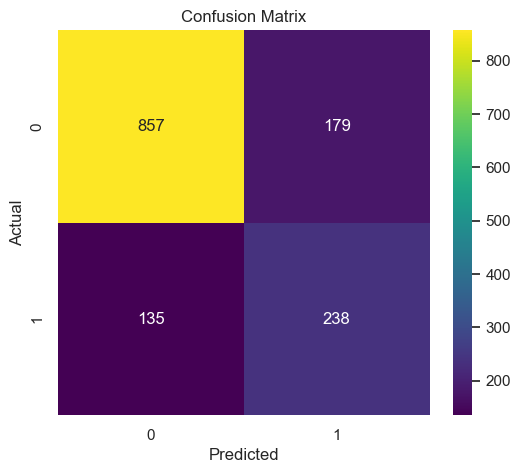

In [153]:
rf_model =  RandomForestClassifier()
evaluate_model(rf_model)

Performance Metrics:
--------------------------------------------------
Test Accuracy: 0.7580
Test Precision: 0.5352
Test Recall: 0.6515
Test F1 Score: 0.5877
Test ROC AUC: 0.7239


Classification Report:
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.80      0.83      1036
           1       0.54      0.65      0.59       373

    accuracy                           0.76      1409
   macro avg       0.70      0.72      0.71      1409
weighted avg       0.78      0.76      0.76      1409



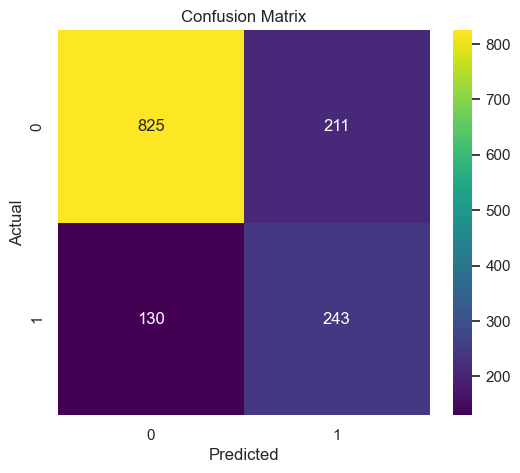

In [154]:
xgb_model =  XGBClassifier()
evaluate_model(xgb_model)

Performance Metrics:
--------------------------------------------------
Test Accuracy: 0.7175
Test Precision: 0.4713
Test Recall: 0.5496
Test F1 Score: 0.5074
Test ROC AUC: 0.6638


Classification Report:
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.78      0.80      1036
           1       0.47      0.55      0.51       373

    accuracy                           0.72      1409
   macro avg       0.65      0.66      0.65      1409
weighted avg       0.73      0.72      0.72      1409



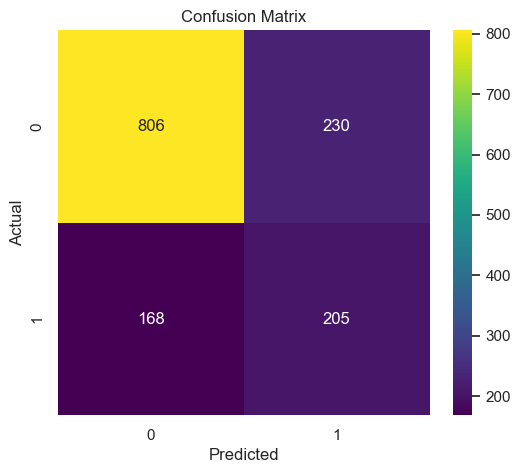

In [155]:
dt_model =  DecisionTreeClassifier()
evaluate_model(dt_model)

Performance Metrics:
--------------------------------------------------
Test Accuracy: 0.7729
Test Precision: 0.5481
Test Recall: 0.8097
Test F1 Score: 0.6537
Test ROC AUC: 0.7847


Classification Report:
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.76      0.83      1036
           1       0.55      0.81      0.65       373

    accuracy                           0.77      1409
   macro avg       0.73      0.78      0.74      1409
weighted avg       0.82      0.77      0.78      1409



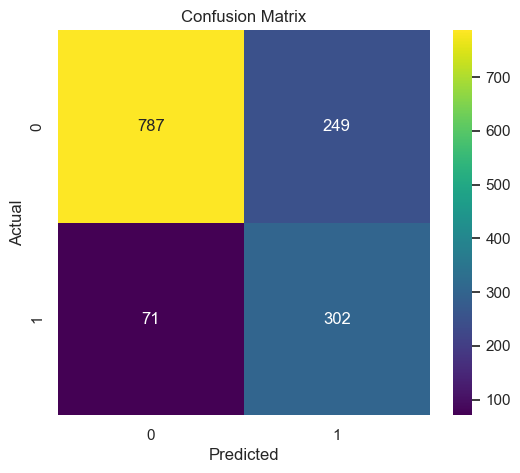

In [156]:
gd_model = GradientBoostingClassifier()
evaluate_model(gd_model)

Performance Metrics:
--------------------------------------------------
Test Accuracy: 0.7693
Test Precision: 0.5453
Test Recall: 0.7748
Test F1 Score: 0.6401
Test ROC AUC: 0.7711


Classification Report:
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.77      0.83      1036
           1       0.55      0.77      0.64       373

    accuracy                           0.77      1409
   macro avg       0.72      0.77      0.74      1409
weighted avg       0.81      0.77      0.78      1409



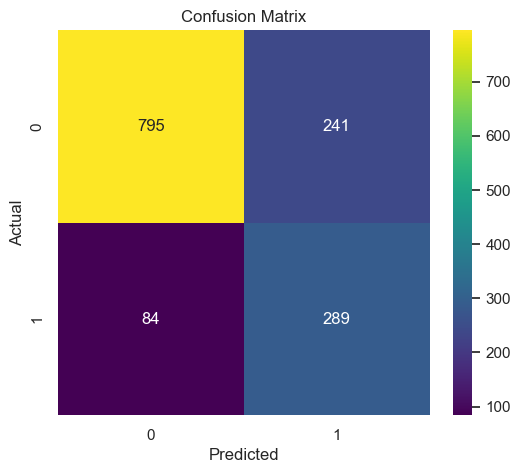

In [157]:
lr_model = LogisticRegression()
evaluate_model(lr_model)

Performance Metrics:
--------------------------------------------------
Test Accuracy: 0.7594
Test Precision: 0.5294
Test Recall: 0.8204
Test F1 Score: 0.6435
Test ROC AUC: 0.7789


Classification Report:
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.74      0.82      1036
           1       0.53      0.82      0.64       373

    accuracy                           0.76      1409
   macro avg       0.72      0.78      0.73      1409
weighted avg       0.82      0.76      0.77      1409



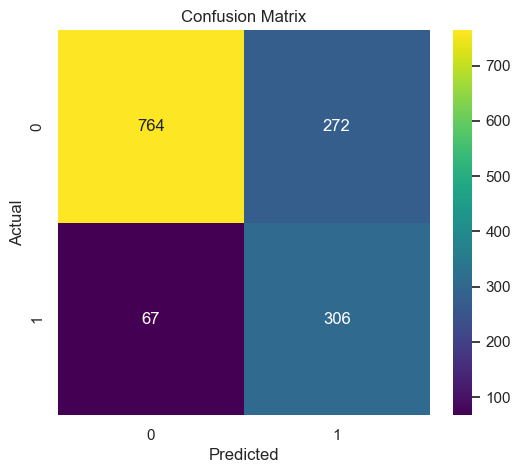

In [158]:
ada_model = AdaBoostClassifier()
evaluate_model(ada_model)

Performance Metrics:
--------------------------------------------------
Test Accuracy: 0.6813
Test Precision: 0.4479
Test Recall: 0.8767
Test F1 Score: 0.5929
Test ROC AUC: 0.7438


Classification Report:
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.61      0.74      1036
           1       0.45      0.88      0.59       373

    accuracy                           0.68      1409
   macro avg       0.69      0.74      0.67      1409
weighted avg       0.80      0.68      0.70      1409



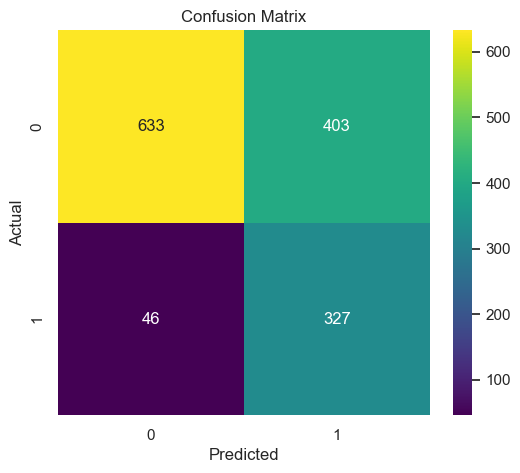

In [159]:
gnb_model = GaussianNB()
evaluate_model(gnb_model)

Performance Metrics:
--------------------------------------------------
Test Accuracy: 0.7672
Test Precision: 0.5442
Test Recall: 0.7426
Test F1 Score: 0.6281
Test ROC AUC: 0.7593


Classification Report:
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.78      0.83      1036
           1       0.54      0.74      0.63       373

    accuracy                           0.77      1409
   macro avg       0.72      0.76      0.73      1409
weighted avg       0.80      0.77      0.78      1409



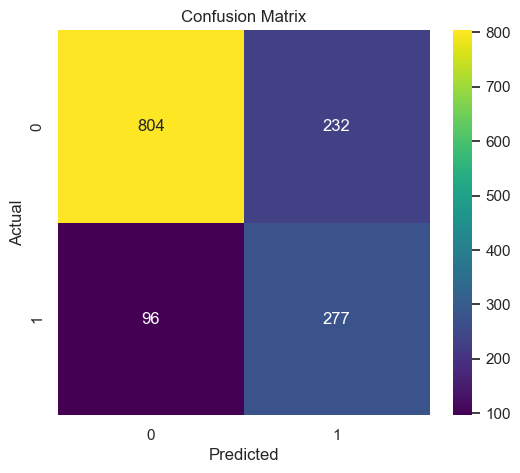

In [160]:
svm_model = SVC()
evaluate_model(svm_model)

In [161]:
## Create a list of model names
Models = ['Random Forest', 'XGBoost', 'Decision Tree','Gradient Boosting', 'Logistic Regression','AdaBoost','GaussianNB','SVM']
results = pd.DataFrame({
    "Models": Models,
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1": f1,
    "AUC": auc
})

# Set Models as index
results.set_index('Models', inplace=True)

# Format decimal places
results = results.round(4)

results.sort_values(by=['Recall', 'Accuracy'], ascending=False)

,Accuracy,Precision,Recall,F1,AUC
Models,,,,,
GaussianNB,0.6813,0.4479,0.8767,0.5929,0.7438
AdaBoost,0.7594,0.5294,0.8204,0.6435,0.7789
Gradient Boosting,0.7729,0.5481,0.8097,0.6537,0.7847
Logistic Regression,0.7693,0.5453,0.7748,0.6401,0.7711
SVM,0.7672,0.5442,0.7426,0.6281,0.7593
XGBoost,0.7580,0.5352,0.6515,0.5877,0.7239
Random Forest,0.7771,0.5707,0.6381,0.6025,0.7326
Decision Tree,0.7175,0.4713,0.5496,0.5074,0.6638


### Observation- Adaboost & Gradient Boosting algorithms have maximum recall, lets hypertune the parameters for these two Model

### Graident Boosting Hyperparamater tunning using GridSearchCV

In [162]:
param_grid_gd = {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.3],
        'max_depth': [3, 4, 5],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    }
    
# Initialize model
gb = GradientBoostingClassifier()
    
# Initialize GridSearchCV
grid_search_gb = GridSearchCV(
    estimator=gb,
    param_grid=param_grid_gd,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

# Fit to the data
grid_search_gb.fit(x_train, y_train)

# Best parameters and score
best_params_gb = grid_search_gb.best_params_
print("Best Parameters:", best_params_gb)
print("Best Score:", grid_search_gb.best_score_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Best Score: 0.8223852474568355


In [164]:
gd_tuned_model = GradientBoostingClassifier(learning_rate= best_params_gb['learning_rate'], max_depth= best_params_gb['max_depth'], min_samples_leaf= best_params_gb['min_samples_leaf'], min_samples_split= best_params_gb['min_samples_split'], n_estimators= best_params_gb['n_estimators'])
gd_tuned_model.fit(x_train, y_train)
y_test_pred_gd = gd_tuned_model.predict(x_test)
acc_gd_tuned = accuracy_score(y_test, y_test_pred_gd)
recall_gd_tuned = recall_score(y_test, y_test_pred_gd)
precision_gd_tuned = precision_score(y_test, y_test_pred_gd)
print(f"Accuracy Score {acc_gd_tuned}")
print(f"Recall Score {recall_gd_tuned}")
print(f"Precision Score {precision_gd_tuned}")

Accuracy Score 0.7821149751596878
Recall Score 0.6729222520107239
Precision Score 0.5756880733944955


### Ada Boosting Hyperparamater tunning using GridSearchCV

In [165]:
params_ada = {
               'n_estimators': [50, 100, 500],
               'learning_rate': [0.01,0.1,1,10],
               'algorithm' : ['SAMME.R','SAMME'],
          }

# Initialize model
ada = AdaBoostClassifier()
    
# Initialize GridSearchCV
grid_search_ada = GridSearchCV(
    estimator=ada,
    param_grid=params_ada,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

# Fit to the data
grid_search_ada.fit(x_train, y_train)

# Best parameters and score
best_params_ada = grid_search_ada.best_params_
print("Best Parameters:", best_params_ada)
print("Best Score:", grid_search_ada.best_score_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters: {'algorithm': 'SAMME.R', 'learning_rate': 1, 'n_estimators': 500}
Best Score: 0.7988215333420904


In [166]:
ada_tuned_model = AdaBoostClassifier(learning_rate= best_params_ada['learning_rate'], n_estimators= best_params_ada['n_estimators'], algorithm =best_params_ada['algorithm'] )
ada_tuned_model.fit(x_train, y_train)
y_test_pred_ada = ada_tuned_model.predict(x_test)
acc_ada_tuned = accuracy_score(y_test, y_test_pred_ada)
recall_ada_tuned = recall_score(y_test, y_test_pred_ada)
precision_ada_tuned = precision_score(y_test, y_test_pred_ada)
print(f"Accuracy Score {acc_ada_tuned}")
print(f"Recall Score {recall_ada_tuned}")
print(f"Precision Score {precision_ada_tuned}")

Accuracy Score 0.7814052519517388
Recall Score 0.806970509383378
Precision Score 0.5605214152700186


### A confusion matrix is a table that visualizes the performance of a classification model by showing the relationships between predicted and actual values. 


Here's a breakdown:

Where:
* TP (True Positive): Correctly predicted positive
* TN (True Negative): Correctly predicted negative
* FP (False Positive): Incorrectly predicted positive
* FN (False Negative): Incorrectly predicted negative

Key metrics derived from the confusion matrix:

* Accuracy = (TP + TN) / (TP + TN + FP + FN)
* Precision = TP / (TP + FP)
* Recall (Sensitivity) = TP / (TP + FN)
* Specificity = TN / (TN + FP)
* F1 Score = 2 * (Precision * Recall) / (Precision + Recall)

### Random Forest Hyperparamter tunning using GridSearchCV

In [167]:
###GridSearchCV

from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_features':['sqrt','log2'],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

# Initialize GridSearchCV
grid_search_rf = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid_rf,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

# Fit to the data
grid_search_rf.fit(x_train, y_train)

# Best parameters and score
best_params_rf = grid_search_rf.best_params_
print("Best Parameters:", grid_search_rf.best_params_)
print("Best Score:", grid_search_rf.best_score_)

Fitting 3 folds for each of 54 candidates, totalling 162 fits
Best Parameters: {'max_depth': 15, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 200}
Best Score: 0.8407468278163722


In [168]:
rf_model = RandomForestClassifier(max_depth= best_params_rf['max_depth'], max_features = 'sqrt', min_samples_split= best_params_rf['min_samples_split'], n_estimators= best_params_rf['n_estimators'])
rf_model.fit(x_train,y_train)
y_train_pred_rff = rf_model.predict(x_train)
y_test_pred_rff = rf_model.predict(x_test)

In [169]:
print("***************** Testing Accuracy after GridSearchCV**************")
rf_gcv_accuracy = accuracy_score(y_test,y_test_pred_rff)
rf_gcv_precision = precision_score(y_test,y_test_pred_rff)
rf_gcv_recall = recall_score(y_test,y_test_pred_rff)
rf_gcv_f1 = f1_score(y_test,y_test_pred_rff)

print(f"Accuracy Score: {rf_gcv_accuracy}")
print(f"Precision Score: {rf_gcv_precision}")
print(f"Recall Score: {rf_gcv_recall}")
print(f"F1 Score: {rf_gcv_f1}")

***************** Testing Accuracy after GridSearchCV**************
Accuracy Score: 0.7792760823278921
Precision Score: 0.5670995670995671
Recall Score: 0.7024128686327078
F1 Score: 0.6275449101796408


In [170]:
'''

### Cross Validation
from sklearn.model_selection import cross_val_score
training_accuracy = cross_val_score(xgb_model, x_train, y_train, cv=10)
print("Training_accuracy: ", training_accuracy.mean())
print("*************************")
print(training_accuracy.max())
'''

'\n\n### Cross Validation\nfrom sklearn.model_selection import cross_val_score\ntraining_accuracy = cross_val_score(xgb_model, x_train, y_train, cv=10)\nprint("Training_accuracy: ", training_accuracy.mean())\nprint("*************************")\nprint(training_accuracy.max())\n'

### XGBoost Hyperparamter tunning using RandomizedSearchCV

In [171]:
##RadmizedSearchCV

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

##Define Parameters

param_grid_xgb = {
    'n_estimators': randint(10, 100),
    'max_depth': [None] + list(range(5, 30)),
    'max_leaves': randint(1, 10),
}

# Initialize RandomizedSearchCV
random_search_xgb = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid_xgb,
    n_iter=100,
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)
random_search_xgb.fit(x_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           random_state=None, ...),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [None, 5, 6, 7, 8, 9, 10,
                                                      11, 12, 13, 14, 15, 16,
                                                      17, 18, 19, 20, 21, 22,
                                                      23, 24, 25, 26, 27, 28,
                                                      29],
                                        'max_leaves': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x16a4eb6d0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x31e87dd50>},
                   random_state=42, verbose=2)

In [172]:
best_param_xgb = random_search_xgb.best_params_
print("Best Parameters: ", random_search_xgb.best_params_)
print("Best score: ", random_search_xgb.best_score_)

Best Parameters:  {'max_depth': 10, 'max_leaves': 9, 'n_estimators': 97}
Best score:  0.8156167082621831


In [173]:
xgb_rd_model = XGBClassifier(n_estimators = best_param_xgb['n_estimators'], max_depth = best_param_xgb['max_depth'], 
                       max_leaves = best_param_xgb['max_leaves'])
xgb_rd_model.fit(x_train,y_train)
y_train_pred_xgb_rd = xgb_rd_model.predict(x_train)
y_test_pred_xbg_rd = xgb_rd_model.predict(x_test)

In [174]:
## Evaludation Metrics

xgb_tuned_train_acuracy = accuracy_score(y_train, y_train_pred_xgb_rd)
print(f"Training Accuracy Score: {xgb_tuned_train_acuracy}")

xgb_tuned_acuracy = accuracy_score(y_test, y_test_pred_xbg_rd)
xgb_tuned_precision = precision_score(y_test, y_test_pred_xbg_rd)
xgb_tuned_recall = recall_score(y_test, y_test_pred_xbg_rd)
xgb_tuned_f1 = f1_score(y_test, y_test_pred_xbg_rd)

print(f"Test Accuracy Score: {xgb_tuned_acuracy}")
print(f"Test Precision Score: {xgb_tuned_precision}")
print(f"Test Recall Score: {xgb_tuned_recall}")
print(f"Test F1 Score: {xgb_tuned_f1}")

Training Accuracy Score: 0.8523441275978734
Test Accuracy Score: 0.7693399574166075
Test Precision Score: 0.5470588235294118
Test Recall Score: 0.7479892761394102
Test F1 Score: 0.6319365798414497


## Deep Learning Approach - Multilayer Perceptron

In [175]:
x_train.shape

(8276, 30)

In [176]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import *
from keras import Sequential
from tensorflow.keras.callbacks import EarlyStopping

In [177]:
x_train.shape

(8276, 30)

In [178]:
model = Sequential()
model.add(Dense(32,input_shape=(30,), activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])
# Define Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Fitting the model using training data
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=150, batch_size=32, verbose=1, callbacks=[early_stopping])

Epoch 1/150
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 650us/step - accuracy: 0.6788 - loss: 0.5875 - val_accuracy: 0.7559 - val_loss: 0.4896
Epoch 2/150
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step - accuracy: 0.7890 - loss: 0.4604 - val_accuracy: 0.7786 - val_loss: 0.4497
Epoch 3/150
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step - accuracy: 0.7964 - loss: 0.4453 - val_accuracy: 0.7715 - val_loss: 0.4582
Epoch 4/150
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 466us/step - accuracy: 0.7902 - loss: 0.4484 - val_accuracy: 0.7495 - val_loss: 0.4830
Epoch 5/150
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step - accuracy: 0.7999 - loss: 0.4402 - val_accuracy: 0.7722 - val_loss: 0.4552
Epoch 6/150
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 475us/step - accuracy: 0.8093 - loss: 0.4245 - val_accuracy: 0.7715 - val_loss: 0.4588
Epoch 7/150
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step - accuracy: 0.8085 - loss: 0.4234 - val_accuracy: 0.7601 - val_loss: 0.4790
Epoch 8/150
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 453us/step - accuracy: 0.8040 - loss: 0

In [179]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,613 (18.02 KB)

 Trainable params: 1,537 (6.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,076 (12.02 KB)

In [180]:
## Evaludate the model with accuracy
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 321us/step - accuracy: 0.8041 - loss: 0.4265
Test Accuracy: 0.78


In [181]:
# Make predictions
y_pred_nn = model.predict(x_test)

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 544us/step


In [182]:
# Make predictions
y_pred_nn = (y_pred_nn > 0.5).astype("int32")

In [194]:
print("***********************Classification Report*************************")
print(classification_report(y_test,y_pred_nn))

print("********************Testing Accuracy score**********************")
ann_accuracy = accuracy_score(y_test,y_pred_nn)
ann_precision = precision_score(y_test,y_pred_nn)
ann_recall = recall_score(y_test,y_pred_nn)
ann_f1 = f1_score(y_test,y_pred_nn)


print(f"Test Accuracy Score: {ann_accuracy}")
print(f"Test Precision Score: {ann_precision}")
print(f"Test Recall Score: {ann_recall}")
print(f"Test F1 Score: {ann_f1}")

***********************Classification Report*************************
              precision    recall  f1-score   support

           0       0.89      0.80      0.85      1036
           1       0.57      0.73      0.64       373

    accuracy                           0.78      1409
   macro avg       0.73      0.77      0.74      1409
weighted avg       0.81      0.78      0.79      1409

********************Testing Accuracy score**********************
Test Accuracy Score: 0.7849538679914834
Test Precision Score: 0.5735294117647058
Test Recall Score: 0.7319034852546917
Test F1 Score: 0.6431095406360424


## Evaluate all the Model's performance in a dataframe after Hyperparamter tunning

In [199]:
## First, create lists with model names and metrics
list_model = ['Random Forest Tuned', 'GB Tuned', 'XGB Tuned', 'Ada Tuned', 'Neural Network']
list_accuracy = [rf_gcv_accuracy, acc_gd_tuned, xgb_tuned_acuracy, acc_ada_tuned, ann_accuracy]
list_recall = [rf_gcv_recall, recall_gd_tuned, xgb_tuned_recall, recall_ada_tuned, ann_recall]
list_precision = [rf_gcv_precision, precision_gd_tuned, xgb_tuned_precision, precision_ada_tuned, ann_precision]

# Create DataFrame with formatting
df_performance = pd.DataFrame({
    "Model": list_model,
    "Accuracy": list_accuracy,
    "Recall": list_recall,
    "Precision": list_precision
})

# Sort and format
df_performance = df_performance.sort_values(by='Recall', ascending=False)
df_performance = df_performance.round(4)
df_performance

,Model,Accuracy,Recall,Precision
3,Ada Tuned,0.7814,0.8070,0.5605
2,XGB Tuned,0.7693,0.7480,0.5471
4,Neural Network,0.7850,0.7319,0.5735
0,Random Forest Tuned,0.7793,0.7024,0.5671
1,GB Tuned,0.7821,0.6729,0.5757


## Conclusion

## In the end we conclude that the Telecom Customer Churn Prediction worked best with Ada Boost classifier with hyperparameter with an accuracy score of 78.14% with Recall 80.07% 

### Save the Model for prediction

In [200]:
pickle.dump(ada_tuned_model, open('adaboosttunedmodel.pkl', 'wb'))